In [1]:
import pandas
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
                    sep=';')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<AxesSubplot:xlabel='quality'>

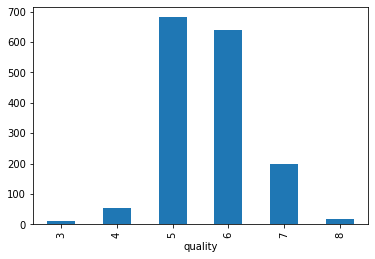

In [5]:
df.groupby('quality').size().plot.bar()

In [6]:
labels = df.pop('quality') # removes the quality column

In [18]:
Xtr, Xte, ytr, yte = train_test_split(df, labels, test_size=0.3)

/Users/dirkhesse/.venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
depth, min_leaf = 5, 20

/Users/dirkhesse/.venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
import mlflow
import mlflow.sklearn

In [11]:
mlflow.set_registry_uri('sqlite:///models.db')

/Users/dirkhesse/.venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
with mlflow.start_run(run_name='tree_run'):
    model = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=min_leaf)
    model.fit(Xtr, ytr)
    mlflow.log_params({
        'depth': depth,
        'min_leaf': min_leaf
    })
    predictions = model.predict(Xte)
    mlflow.log_metrics({
        'r_squared': r2_score(yte, predictions),
        'mse': mean_squared_error(yte, predictions)
    })
    mlflow.sklearn.log_model(model, 'model', registered_model_name='decision_tree_model')

Registered model 'decision_tree_model' already exists. Creating a new version of this model...
Created version '3' of model 'decision_tree_model'.


In [ ]:
# run in a console: mlflow ui

In [15]:
retrieved_model = mlflow.pyfunc.load_model(
    model_uri="models:/decision_tree_model/2"
)

/Users/dirkhesse/.venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
retrieved_model

/Users/dirkhesse/.venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: ecc35fd06d4e4b9c80c17c025c17215e

In [17]:
retrieved_model.predict(Xte)

/Users/dirkhesse/.venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([5.48175182, 5.48175182, 6.05128205, 5.89705882, 5.48175182,
       4.98648649, 5.48175182, 5.89705882, 6.05128205, 5.48175182,
       6.37931034, 5.48175182, 7.        , 5.48175182, 6.2       ,
       5.48175182, 5.48175182, 7.        , 4.98648649, 5.27058824,
       4.98648649, 5.32352941, 4.64285714, 6.05128205, 5.48175182,
       6.2       , 5.48175182, 4.96551724, 5.27058824, 5.48175182,
       5.82758621, 6.37931034, 5.82758621, 4.98648649, 5.41666667,
       6.37931034, 6.37931034, 5.3908046 , 5.05555556, 5.41666667,
       5.3908046 , 5.32352941, 6.05128205, 5.89705882, 7.        ,
       7.        , 5.48175182, 5.3908046 , 6.05128205, 5.89705882,
       5.05555556, 6.66666667, 5.89705882, 6.37931034, 5.3908046 ,
       5.48175182, 6.37931034, 4.96551724, 5.32352941, 6.05128205,
       5.89705882, 5.3908046 , 5.27058824, 5.27058824, 7.        ,
       5.89705882, 5.3908046 , 4.98648649, 5.48175182, 6.05128205,
       5.05555556, 5.3908046 , 4.75      , 5.3908046 , 5.27058

In [1]:
import attr

In [16]:
@attr.s
class MyBanker:
    
    model = attr.ib()
    interest = attr.ib(default=0.05)
    
    def fit(self, X, y):
        self.model.fit(X, y)
        return self

In [5]:
MyBanker(None)

MyBaker(model=None, interest=0.05)

In [7]:
MyBanker()

TypeError: __init__() missing 1 required positional argument: 'model'

In [10]:
import unittest
import unittest.mock

In [21]:
class MyBankerTest(unittest.TestCase):
    
    def test_fit(self):
        mock_model = unittest.mock.Mock()
        banker = MyBanker(mock_model)
        banker.fit('X', 'y')
        mock_model.fit.assert_called_with('X', 'y')

In [22]:
unittest.main(argv=[''], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [23]:
# Refer to 'Clean code' and 'The clean Coder' by Robert Martin

# Command line arguments

In [25]:
# I want to call my script like so:
# test_lending.py --interest 0.05 --model tree

In [26]:
import argparse

In [31]:
parser = argparse.ArgumentParser(description='One line descripption of my program.')

In [ ]:
# Normally:
# if __name__ == '__main__':
#   parser.parse_args()

In [28]:
try:
    parser.parse_args(['-h'])
except:
    pass

usage: ipykernel_launcher.py [-h]

One line descripption of my program.

optional arguments:
  -h, --help  show this help message and exit


In [32]:
parser.add_argument('--interest', default=0.05, type=float)

_StoreAction(option_strings=['--interest'], dest='interest', nargs=None, const=None, default=0.05, type=<class 'float'>, choices=None, help=None, metavar=None)

In [33]:
parser.parse_args(['--interest',  '0.05'])

Namespace(interest=0.05)

# Creating a model

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
@attr.s
class MyBanker:
    
    model = attr.ib(factory=LogisticRegression)

In [37]:
MyBanker()

MyBanker(model=LogisticRegression())

In [38]:
def model_factory(model_name, **args):
    if model_name == 'logistic':
        return LogisticRegression(**args)

In [39]:
model_factory('logistic', C=0.5)

LogisticRegression(C=0.5)

In [40]:
model_factory('lostic', C=0.5)

In [46]:
def model_factory(model_name, **args):
    classes = {'logistic': LogisticRegression}
    model_class = classes.get(model_name)
    if model_class:
        return model_class(**args)
    else:
        raise NotImplementedError(f"Model class {model_name} unknow. "
                                  f"Possible models are {classes.keys()}.")

In [47]:
model_factory('logistic', C=0.5)

LogisticRegression(C=0.5)

In [48]:
model_factory('tree', depth=5)

NotImplementedError: Model class tree unknow. Possible models are dict_keys(['logistic']).

# YAML

In [49]:
import yaml

In [50]:
yaml.full_load("""
params:
    C: 0.75
    interest: 0.06
list: [1, 2, 3]
other_list:
  - this
  - is 
  - a
  - list
""")

{'params': {'C': 0.75, 'interest': 0.06},
 'list': [1, 2, 3],
 'other_list': ['this', 'is', 'a', 'list']}

In [53]:
@attr.s
class Evaluator(yaml.YAMLObject):
    
    yaml_tag = u"!Evaluator"
    
    interest = attr.ib()
    folds = attr.ib()

In [55]:
yaml.full_load("""
- !Evaluator
 interest: 0.06
 folds: 10
""")

[Evaluator(interest=0.06, folds=10)]

In [58]:
attr.asdict(Evaluator(0.03, 5))

{'interest': 0.03, 'folds': 5}

In [59]:
import json

In [60]:
d = attr.asdict(Evaluator(0.03, 5))

In [65]:
print(json.dumps(d, indent=2))

{
  "interest": 0.03,
  "folds": 5
}


In [69]:
json.loads('{"a": [1,2,3]}') # stirng to python object

{'a': [1, 2, 3]}

In [70]:
import tinydb

In [72]:
db = tinydb.TinyDB('tinydb.json')

In [73]:
db.insert({'name': {'last': 'Lennon', 'first': 'John'}, 'born': 1940, 'band': 'Beatles, The'})

1

In [74]:
Artist = tinydb.Query()

In [76]:
db.search(Artist.band == 'Beatles, The')

[{'name': {'last': 'Lennon', 'first': 'John'},
  'born': 1940,
  'band': 'Beatles, The'}]

In [77]:
db.count(Artist.band == 'Beatles, The')

1

In [78]:
db.contains(Artist.band == 'Beatles, The')

True

In [79]:
db.update({'name': {'last': 'Lennon', 'middle': 'Winston', 'first': 'John'}}, 
          Artist.name.last == 'Lennon')

[1]

In [80]:
db.search(Artist.band == 'Beatles, The')

[{'name': {'last': 'Lennon', 'middle': 'Winston', 'first': 'John'},
  'born': 1940,
  'band': 'Beatles, The'}]

# Twitter

In [81]:
import requests
from requests_oauthlib import OAuth1

In [82]:
from donthackme import *

In [83]:
auth = OAuth1(API_KEY, API_KEY_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

In [84]:
url = 'https://api.twitter.com/1.1/account/verify_credentials.json'

In [85]:
verify_response = requests.get(url, auth=auth)

In [86]:
verify_response

<Response [200]>

In [87]:
verify_response.headers

{'cache-control': 'no-cache, no-store, must-revalidate, pre-check=0, post-check=0', 'content-disposition': 'attachment; filename=json.json', 'content-encoding': 'gzip', 'content-length': '1360', 'content-type': 'application/json;charset=utf-8', 'date': 'Thu, 12 Nov 2020 10:36:49 GMT', 'expires': 'Tue, 31 Mar 1981 05:00:00 GMT', 'last-modified': 'Thu, 12 Nov 2020 10:36:48 GMT', 'pragma': 'no-cache', 'server': 'tsa_o', 'set-cookie': 'personalization_id="v1_yIbGLHkiqghS0j4td9W5Yw=="; Max-Age=63072000; Expires=Sat, 12 Nov 2022 10:36:48 GMT; Path=/; Domain=.twitter.com; Secure; SameSite=None, lang=en-gb; Path=/, guest_id=v1%3A160517740896472587; Max-Age=63072000; Expires=Sat, 12 Nov 2022 10:36:48 GMT; Path=/; Domain=.twitter.com; Secure; SameSite=None', 'status': '200 OK', 'strict-transport-security': 'max-age=631138519', 'x-access-level': 'read', 'x-connection-hash': '2bba7301420c01408543c1b356c90fcc', 'x-content-type-options': 'nosniff', 'x-frame-options': 'SAMEORIGIN', 'x-rate-limit-limi

In [91]:
verify_response.json()['name']

'Dirk Hesse'

In [92]:
verify_response.json()['screen_name']

'NotDirkHesse'

In [93]:
verify_response.json().keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type', 'suspended', 'needs_phone_verification'])